乐学偶得版权所有 lexueoude.com 公众号：乐学Fintech

Logistic Regression 更多的是从概率的层面进行建模，但是我们实际应用中，更多的是用在二元分类型的问题

思考：如何算"更好的拟合"？ 类比一元线性回归的最小二乘法


Logistic_Regression

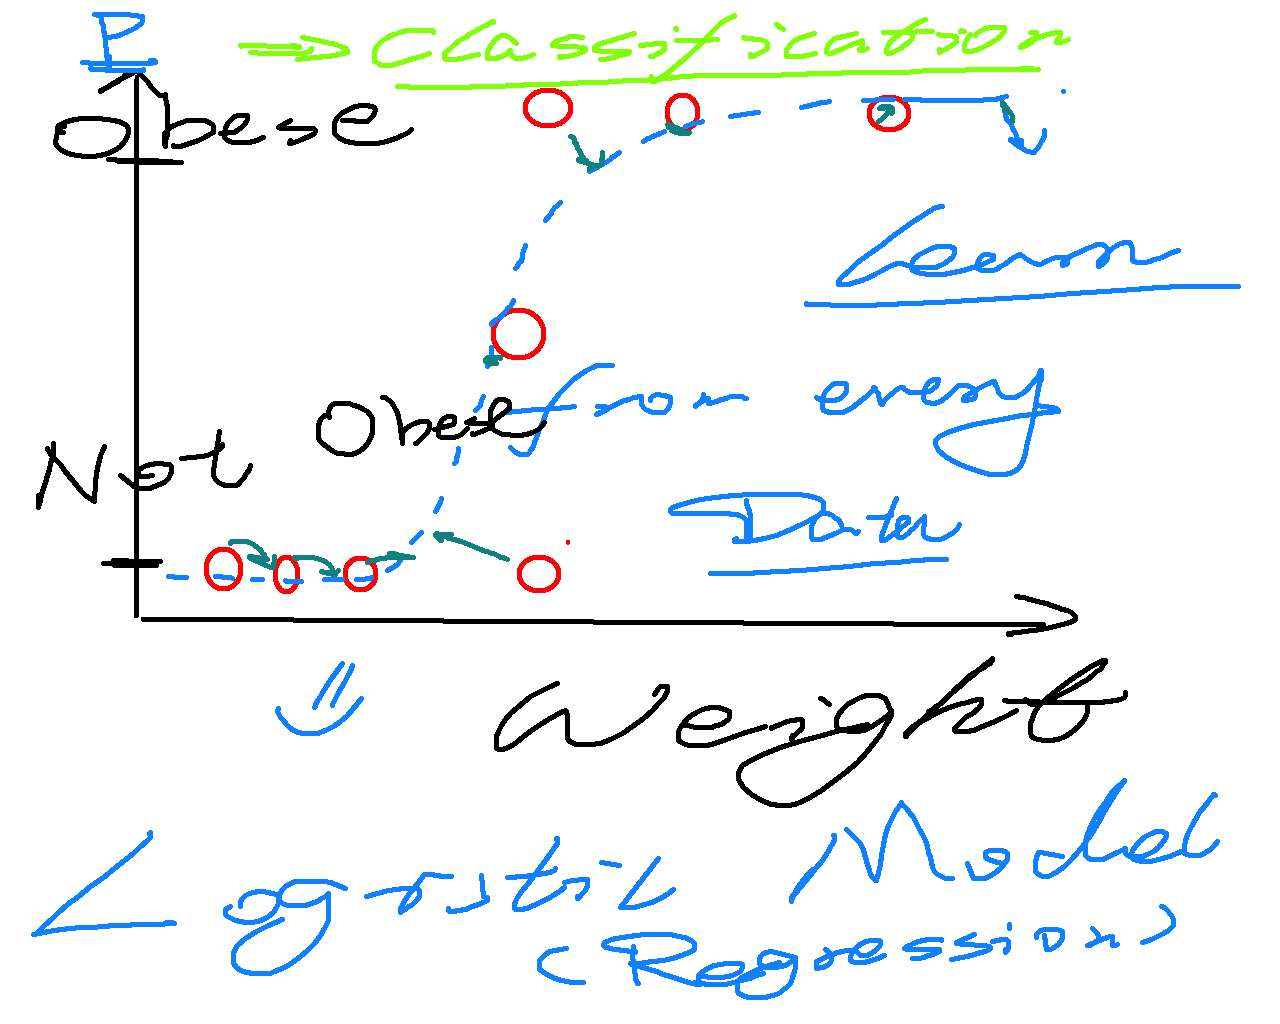

In [3]:
from IPython.display import Image
Image(filename='1.Logistic_Regression_Intro.png')

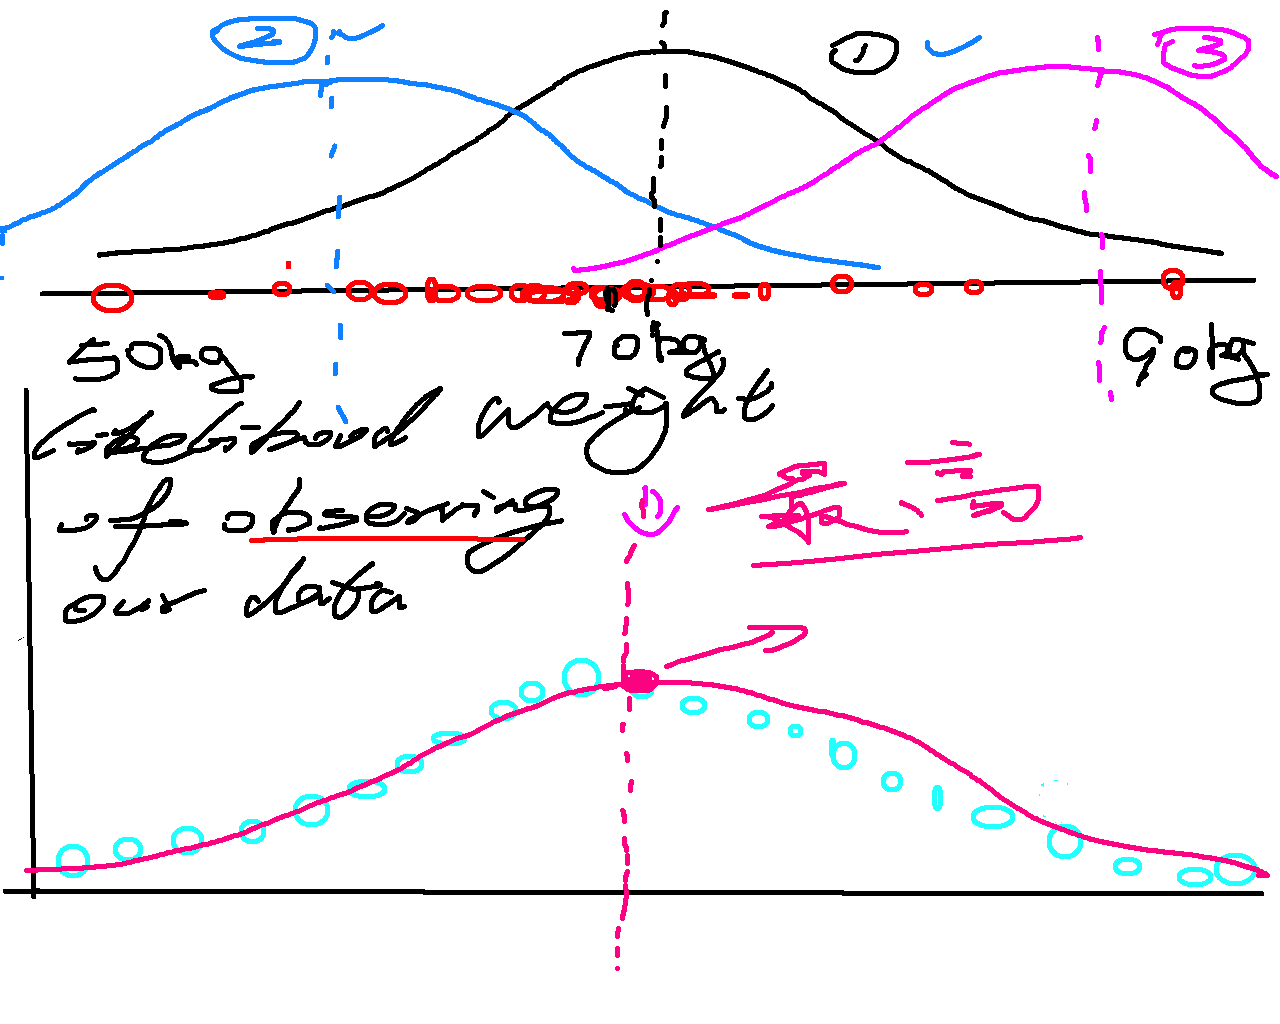

In [4]:
from IPython.display import Image
Image(filename='1.Maximum_Likelihood.png')

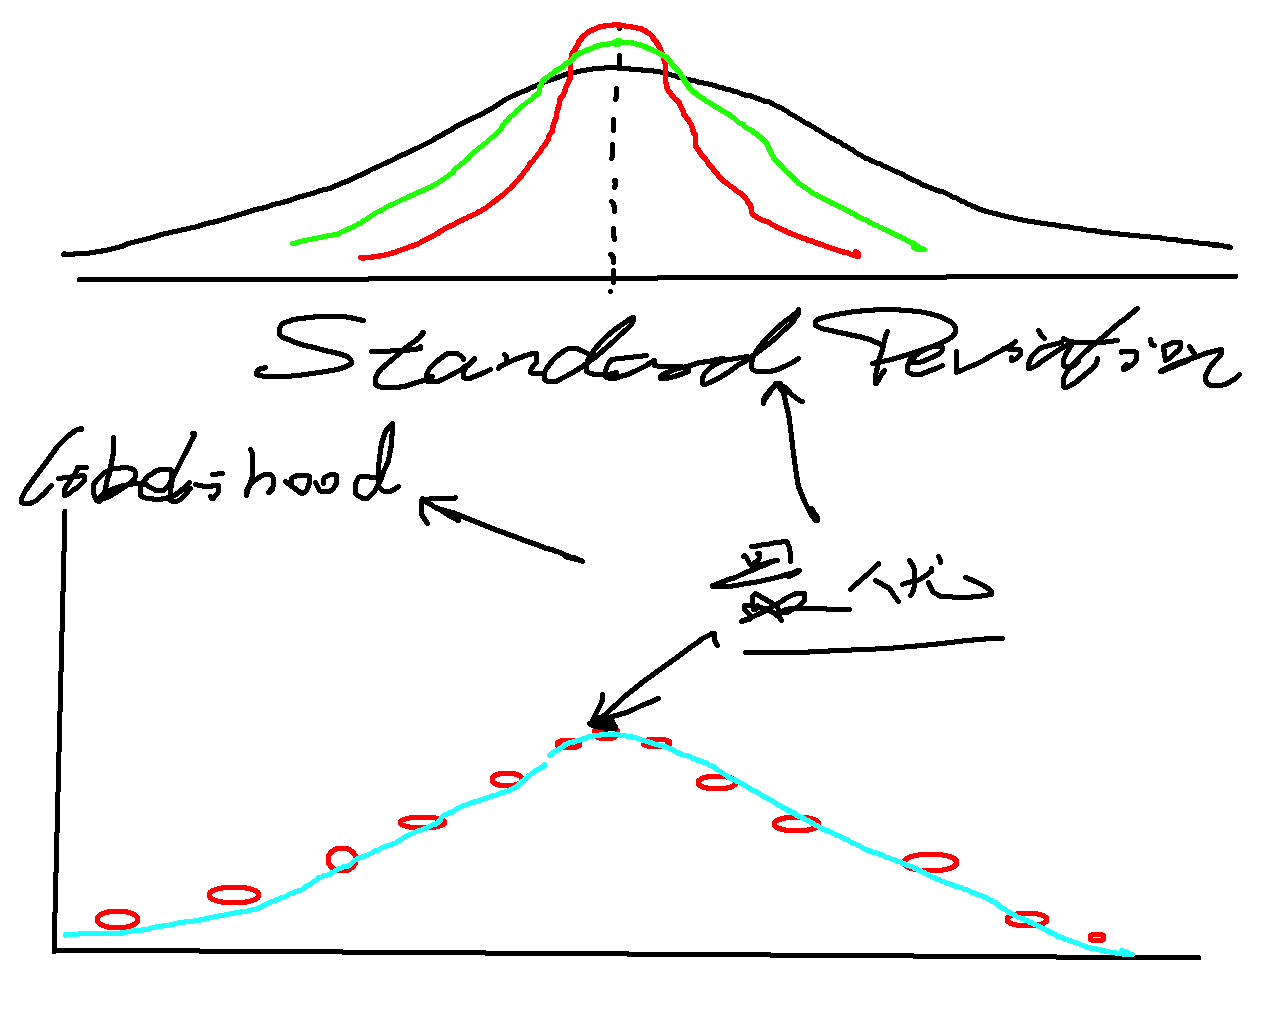

In [5]:
from IPython.display import Image
Image(filename='1.Maximum_Likelihood_2.png')

